#**Pima indian Diabetes Dataset**


In [5]:
#importing necessory libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

sns.set()


In [6]:
# now loading dataset of diabetes.csv
df=pd.read_csv('diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


###**checking here for basic sturcture of dataset is:**

In [7]:
#checking here for basic sturcture of dataset is:
df.shape

(768, 9)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [9]:
df.describe() #it show the numerical cols statiscial summary

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [10]:
df.isnull().sum()


,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


In [11]:
#Replace invalid zero values with mean (in specific columns)

cols_with_zeros = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
for col in cols_with_zeros:
    df[col].replace(0, df[col].median(), inplace=True)



/tmp/ipython-input-3254041594.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].replace(0, df[col].median(), inplace=True)


In [12]:
print("Replaced zeros in:",cols_with_zeros)

Replaced zeros in: ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']


In [13]:
print(df["Outcome"].value_counts())


Outcome
0    500
1    268
Name: count, dtype: int64


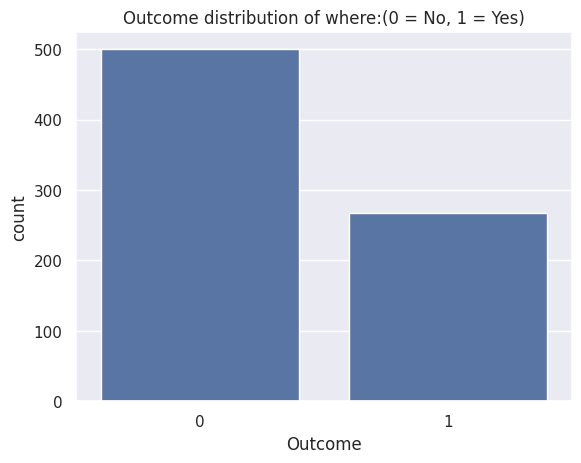

In [14]:
sns.countplot(x="Outcome", data=df)
plt.title("Outcome distribution of where:(0 = No, 1 = Yes)")
plt.show()


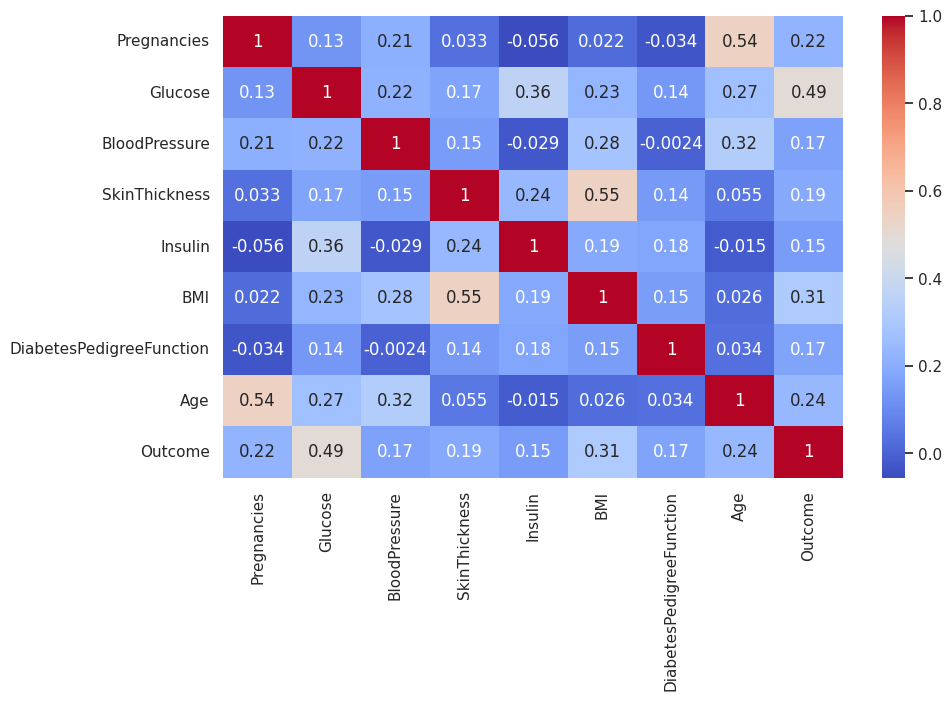

In [15]:
#feature co-relation
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.show()


In [16]:
#at here we select our target feature in X and y:

X= df.drop('Outcome', axis=1)
y= df['Outcome']

In [17]:
#now we split the data for train and test fro modeling called train/test split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)


In [18]:
X_train.shape,X_test.shape

((537, 8), (231, 8))

In [19]:
#here we do feature scaling (the SVM need best normalized feature for grete performance)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [26]:
#now for here we use first clissifer SVM
svm_model = SVC(kernel='rbf', random_state=42,)
svm_model.fit(X_train, y_train)
y_pred_svm = svm_model.predict(X_test)
print("SVM is trained!")

SVM is trained!


In [27]:
# Evaluate the SVM model
svm_accuracy = accuracy_score(y_test, y_pred_svm)
svm_conf_matrix = confusion_matrix(y_test, y_pred_svm)
svm_class_report = classification_report(y_test, y_pred_svm)

print(f"SVM Accuracy: {svm_accuracy:.4f}")
print("\nSVM Confusion Matrix:")
print(svm_conf_matrix)
print("\nSVM Classification Report:")
print(svm_class_report)

SVM Accuracy: 0.7403

SVM Confusion Matrix:
[[125  26]
 [ 34  46]]

SVM Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.83      0.81       151
           1       0.64      0.57      0.61        80

    accuracy                           0.74       231
   macro avg       0.71      0.70      0.71       231
weighted avg       0.74      0.74      0.74       231



In [28]:
#here we second clisifier Decision Tree Model
dt_model = DecisionTreeClassifier(max_depth=4, random_state=42)
dt_model.fit(X_train, y_train)
y_pred_dt = dt_model.predict(X_test)
print("Decision Tree trained !")


Decision Tree trained !


In [29]:
dt_accuracy = accuracy_score(y_test, y_pred_dt)
dt_conf_matrix = confusion_matrix(y_test, y_pred_dt)
dt_class_report = classification_report(y_test, y_pred_dt)

print(f"Decision Tree Accuracy: {dt_accuracy:.4f}")
print("\nDecision Tree Confusion Matrix:")
print(dt_conf_matrix)
print("\nDecision Tree Classification Report:")
print(dt_class_report)

Decision Tree Accuracy: 0.7013

Decision Tree Confusion Matrix:
[[97 54]
 [15 65]]

Decision Tree Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.64      0.74       151
           1       0.55      0.81      0.65        80

    accuracy                           0.70       231
   macro avg       0.71      0.73      0.70       231
weighted avg       0.76      0.70      0.71       231



SVM accuracy: 0.7403 | Decision Tree accuracy: 0.7013
SVM performed better on test set.


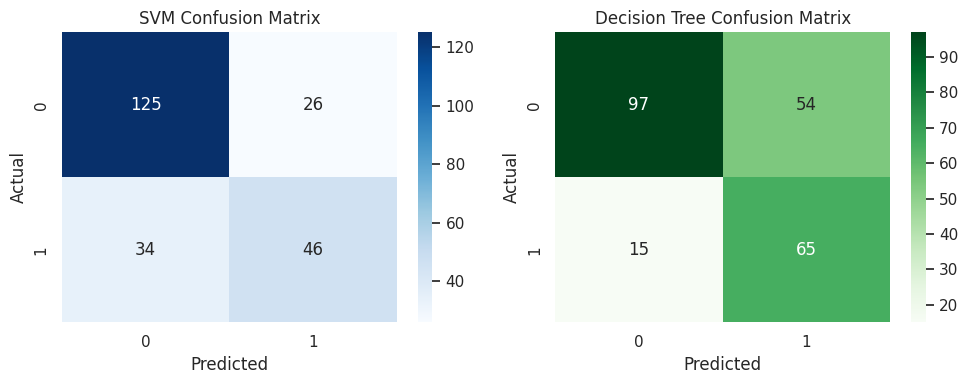

In [30]:
#here is the comparision of both models with visualization
svm_acc = accuracy_score(y_test, y_pred_svm)
dt_acc = accuracy_score(y_test, y_pred_dt)

print(f"SVM accuracy: {svm_acc:.4f} | Decision Tree accuracy: {dt_acc:.4f}")
if svm_acc > dt_acc:
    print("SVM performed better on test set.")
else:
    print("Decision Tree performed better or equally.")

# Confusion matrices plot
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
sns.heatmap(confusion_matrix(y_test, y_pred_svm), annot=True, fmt='d', cmap='Blues')
plt.title("SVM Confusion Matrix")
plt.xlabel("Predicted"); plt.ylabel("Actual")

plt.subplot(1,2,2)
sns.heatmap(confusion_matrix(y_test, y_pred_dt), annot=True, fmt='d', cmap='Greens')
plt.title("Decision Tree Confusion Matrix")
plt.xlabel("Predicted"); plt.ylabel("Actual")

plt.tight_layout()
plt.show()


###Here models feel underfit because it give less accurate in both TEST and TRAIN,although SVM perform a little better as compair to Dession Tree model, you can also see the confusion matrix visualization for compariative performance.

